# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Granizo, Mateo
*   Alumno 2: Maiolo, Pablo
*   Alumno 3: Miglino, Diego






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/TP_Grupal"
mount='./'

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False
print(IN_COLAB)

False


---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

Archivos en el directorio: 
['.git', '.ipynb_checkpoints', 'anaconda_projects', 'apr_g9_dqn_SpaceInvaders-v0_log.json', 'APR_Grupo_9.ipynb', 'best_model_weights.h5f.data-00000-of-00001', 'best_model_weights.h5f.index', 'checkpoint', 'mejor_ejecucion.txt', 'README.md', 'SpaceInvaders_ReinforcementLearning']


---
### 1.4. Instalar librerías necesarias

In [3]:
# ejecutar solo la primera vez..

if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0
  %pip install matplotlib==3.3.4

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/Kojoley/atari-py.git to c:\users\dmigl\appdata\local\temp\pip-req-build-r02cc9bg
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git 'C:\Users\dmigl\AppData\Local\Temp\pip-req-build-r02cc9bg'


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl.metadata (2.0 kB)
Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [3]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

In [4]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

print("Numero de acciones disponibles: " + str(nb_actions))
print("Formato de las observaciones: " + str(env.observation_space))

Numero de acciones disponibles: 6
Formato de las observaciones: Box(0, 255, (210, 160, 3), uint8)


In [5]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [6]:
from rl.callbacks import Callback
import numpy as np

class SaveBestRewardCallback(Callback):
    def __init__(self, env,
                 filename='best_model.h5f',
                 test_episodes=3,
                 test_interval=50):
        self.env = env
        self.filename = filename
        self.test_episodes = test_episodes
        self.test_interval = test_interval
        self.best_reward = -np.inf
        self.steps_since_last_eval = 0

    def on_step_end(self, step, logs=None):
        self.steps_since_last_eval += 1

        if self.steps_since_last_eval >= self.test_interval:
            self.steps_since_last_eval = 0

            # --- congelar contador ---
            saved_step = self.model.step

            # --- evaluación ---
            history = self.model.test(
                self.env,
                nb_episodes=self.test_episodes,
                visualize=False,
                verbose=0
            )
            avg_reward = np.mean(history.history['episode_reward'])

            # --- restaurar contador ---
            self.model.step = saved_step

            print(f"\n>>> Evaluando step {saved_step} -> avg reward: {avg_reward:.2f} -> {history.history['episode_reward']}")

            if avg_reward > self.best_reward:
                self.best_reward = avg_reward
                self.model.save_weights(self.filename, overwrite=True)
                print(f">>> Nuevo récord: {avg_reward:.2f}, pesos guardados en {self.filename}")


In [7]:
import tensorflow as tf

print("Versión de TensorFlow:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("GPU detectada:", gpus[0])
else:
    print("No se detectó GPU")

Versión de TensorFlow: 2.5.3
[]
No se detectó GPU


1. Implementación de la red neuronal

In [8]:
# modelo mas complejo - usar este
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
model = Sequential()
print(K.image_data_format())
print(input_shape)
if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

channels_last
(4, 84, 84)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute (Permute)            (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 20, 32)        8224      
_________________________________________________________________
activation (Activation)      (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
activation_1 (Activation)    (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
activation_2 (Activation)    (

2. Implementación de la solución DQN

In [9]:
# memoria para almacenar la experiencia del agente
memory = SequentialMemory(limit=1000, window_length=WINDOW_LENGTH)

# processor
processor = AtariProcessor()

# policy que el agente va a seguir
#policy = BoltzmannQPolicy()
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1, value_test=.05,
                              nb_steps=50)

# definicion del agente
dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy,
               memory=memory, processor=processor,
               nb_steps_warmup=500, gamma=.99,
               target_model_update=100,
               train_interval=4)

# compilacion del agente
dqn.compile(Adam(learning_rate=.00025), metrics=['mae'])

In [10]:
# entrenamiento del agente
weights_filename = 'apr_g9_dqn_{}_weights.h5f'.format(env_name)
checkpoint_weights_filename = 'apr_g9_dqn_' + env_name + '_weights_{step}.h5f'
log_filename = 'apr_g9_dqn_{}_log.json'.format(env_name)
callbacks = [
            #ModelIntervalCheckpoint(checkpoint_weights_filename, interval=2500),
            FileLogger(log_filename, interval=500),
            SaveBestRewardCallback(env, filename='best_model_weights.h5f', test_episodes=4, test_interval=500)]
dqn.fit(env, callbacks=callbacks, nb_steps=10000, log_interval=100, visualize=False)

# se graban los pesos finales luego de finalizar el entrenamiento
#dqn.save_weights('apr_g9_dqn_{}_weights.h5f'.format(env_name), overwrite=True)

Training for 10000 steps ...
Interval 1 (0 steps performed)
 25/100 [======>.......................] - ETA: 0s - reward: 0.0000e+00

C:\Users\dmigl\anaconda3\envs\env_apr_g9\lib\site-packages\tensorflow\python\keras\engine\training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


100/100 [==============================] - 0s 4ms/step - reward: 0.0000e+00
Interval 2 (100 steps performed)
100/100 [==============================] - 0s 4ms/step - reward: 0.0300
Interval 3 (200 steps performed)
100/100 [==============================] - 0s 4ms/step - reward: 0.0300
Interval 4 (300 steps performed)
100/100 [==============================] - 0s 4ms/step - reward: 0.0100
Interval 5 (400 steps performed)
 98/100 [============================>.] - ETA: 0s - reward: 0.0306  
>>> Evaluando step 499 -> avg reward: 11.50 -> [5.0, 9.0, 11.0, 21.0]
>>> Nuevo récord: 11.50, pesos guardados en best_model_weights.h5f
100/100 [==============================] - 12s 125ms/step - reward: 0.0300
Interval 6 (500 steps performed)
100/100 [==============================] - 0s 4ms/step - reward: 0.0000e+00
1 episodes - episode_reward: 10.000 [10.000, 10.000] - ale.lives: 2.970

Interval 7 (600 steps performed)
100/100 [==============================] - 0s 4ms/step - reward: 0.0100
Interva

In [11]:
# test de n episodios para calcular la recompensa final
dqn.load_weights('best_model_weights.h5f')
history = dqn.test(env, nb_episodes=20, visualize=False)
episode_rewards = history.history['episode_reward']

# Mostrar los resultados
mejor_reward = np.max(episode_rewards)
mejor_epi = np.argmax(episode_rewards) + 1
print(f"\nMejor Episodio {mejor_epi} con Recompensa = {mejor_reward}")

# Guardar la mejor recompensa en un archivo
with open('mejor_ejecucion.txt', 'w') as f:
    f.write(f"Mejor episodio: {mejor_epi} con Recompensa: {mejor_reward}\n")


Testing for 20 episodes ...
Episode 1: reward: 10.000, steps: 708
Episode 2: reward: 12.000, steps: 838
Episode 3: reward: 5.000, steps: 507
Episode 4: reward: 4.000, steps: 507
Episode 5: reward: 5.000, steps: 507
Episode 6: reward: 37.000, steps: 1843
Episode 7: reward: 40.000, steps: 2100
Episode 8: reward: 5.000, steps: 630
Episode 9: reward: 15.000, steps: 1242
Episode 10: reward: 8.000, steps: 485
Episode 11: reward: 7.000, steps: 717
Episode 12: reward: 7.000, steps: 644
Episode 13: reward: 12.000, steps: 924
Episode 14: reward: 5.000, steps: 497
Episode 15: reward: 16.000, steps: 952
Episode 16: reward: 16.000, steps: 995
Episode 17: reward: 15.000, steps: 810
Episode 18: reward: 6.000, steps: 538
Episode 19: reward: 13.000, steps: 830
Episode 20: reward: 17.000, steps: 942

Mejor Episodio 7 con Recompensa = 40.0


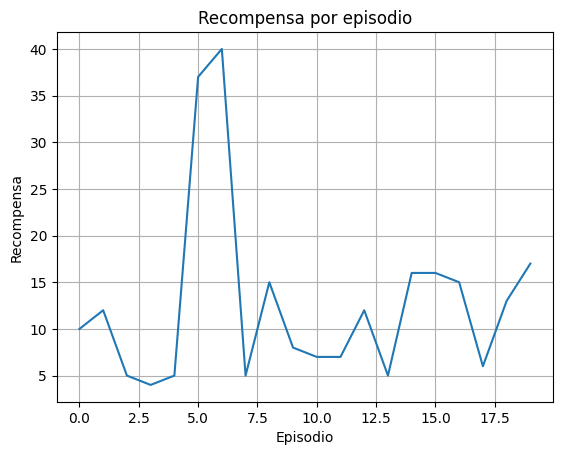

In [12]:
import matplotlib.pyplot as plt

plt.plot(episode_rewards)
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.title("Recompensa por episodio")
plt.grid()
plt.show()

3. Justificación de los parámetros seleccionados y de los resultados obtenidos

---